In [1]:
push!(LOAD_PATH,".")
using ListType, OptionType, Chakra, Nova
using Viewpoints, PPM
using CSV, DataFrames
using Plots

In [2]:
melodies = ["nova/nova001.mid/track1",
            "nova/nova002.mid/track1",
            "nova/nova003.mid/track1",
            "nova/nova004.mid/track1",
            "nova/nova005.mid/track1"]
id_sequences = [obind(find(mel,data),particles) for mel in melodies]
object_sequences = [Chakra.sequence(ids,data) for ids in id_sequences]
pitch_sequences = [vp_map(vp(:pitch),s) for s in object_sequences]
pitch_views = [PPM.View{Int,Int}(ps,ps) for ps in pitch_sequences];

In [3]:
a = Set([54:77...,79,81])
b = Backoff()
e = A()
u = false
o = Bounded(5);

In [4]:
@time predictions = ppm_stm(pitch_views,a,b,e,u,o);
l = length(predictions.Symbol)
#@time probabilities = [p.dist(p.next) for p in predictions]
#@time orders = [p.dist.orders[p.next] for p in predictions];

  5.257670 seconds (10.95 M allocations: 625.429 MiB, 3.61% gc time, 91.27% compilation time)


In [5]:
probabilities = predictions.Prob
ps = predictions.Symbol
orders = predictions.Order
df = CSV.File("/Users/nick/Dropbox/data.csv") |> DataFrame;
idyom_probs = df[!,"probability"][1:l]
idyom_ics = df[!,"information.content"][1:l]
idyom_order = df[!,"cpitch.order.stm.cpitch"][1:l]
idyom_phrase = findall(x->x==1,df[!,"phrase"][1:106])
err = abs.(idyom_probs - probabilities);
DataFrame(Symbol = ps, IdyomOrder = idyom_order, JuliaOrder = orders, IdyomProb = idyom_probs, JuliaProb = probabilities)

,Symbol,IdyomOrder,JuliaOrder,IdyomProb,JuliaProb
,Int64,Int64,Int64,Float64,Float64
1,65,0,0,0.0384615,0.0384615
2,62,0,0,0.0196078,0.0196078
3,60,0,0,0.0135135,0.0131579
4,60,0,0,0.252632,0.257426
5,60,1,1,0.503497,0.634146
6,60,2,2,0.503497,0.861878
7,65,3,0,0.167832,0.0115095
8,65,1,0,0.143284,0.134367
9,65,1,1,0.334262,0.393277


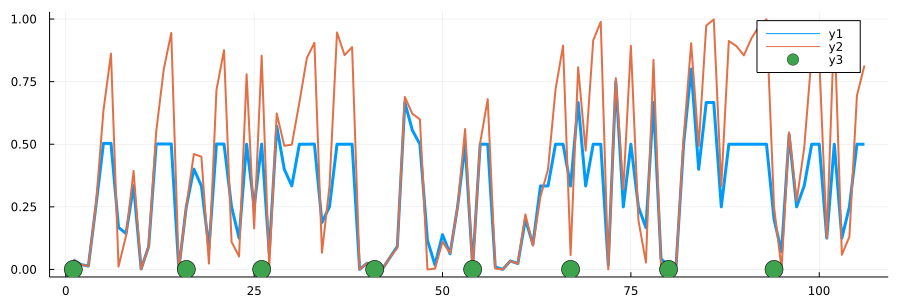

In [6]:
plot(idyom_probs[1:106],lw = 3)
plot!(probabilities[1:106],lw = 2)
scatter!(idyom_phrase,zeros(length(idyom_phrase)),markersize = 10)
plot!(size=(900,300))